In [1]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn import metrics
from scipy.spatial.distance import cdist

## (a)

In [2]:
data1 = np.load("science2k-doc-word.npy")

In [3]:
data2 = pd.read_csv("science2k-vocab.txt", names = ["vocabulary"])

In [4]:
data2.head()

,vocabulary
0,fig
1,cells
2,science
3,two
4,end


In [5]:
data3 = pd.read_csv("science2k-titles.txt", names = ["titles"])

In [6]:
data3.head()

,titles
0,Archaeology in the Holy Land
1,"Baedeker's Guide, or Just Plain 'Trouble'?"
2,Duchamp's L.H.O.O.Q.-From 1919 or 1930?
3,Resistance to Bt Toxins
4,Corrections and Clarifications: Commercializat...


In [9]:
dist= []
K = range(1,21)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(data1)
    kmeanModel.fit(data1)
    dist.append(sum(np.min(cdist(data1, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / data1.shape[0])

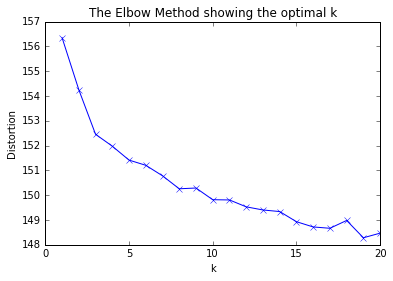

In [10]:
# Plot the elbow
plt.plot(K, dist, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [11]:
kmeans = KMeans(n_clusters=3, random_state=0).fit(data1)

In [12]:
mean = data1.mean(0)

In [13]:
mean

array([ 6.12158107,  3.39409491,  9.01546653, ..., -0.5040002 ,
       -0.58283004, -0.5696959 ])

In [14]:
cluster_centers = kmeans.cluster_centers_

In [16]:
def f(a,N): 
    return np.argsort(a)[::-1][:N]

In [17]:
index_list_for_clusters = []
for cluster_center in cluster_centers:
    diffs = abs(np.subtract(cluster_center,mean))
    index =  f(diffs,10)
    index_list_for_clusters.append(index)
    print index

[  0   7  96  17  39   1  99 154  20  16]
[  0  64  20  24 403 358 129  59 484 141]
[  7   5   1  23   0  22  17  56 161  51]


In [18]:
for index_list in index_list_for_clusters:
    print data2.iloc[index_list]

      vocabulary
0            fig
7        protein
96        values
17          gene
39   temperature
1          cells
99         range
154        shows
20      observed
16       surface
         vocabulary
0               fig
64          reports
20         observed
24            shown
403  correspondence
358       addressed
129    respectively
59         function
484           email
141      consistent
     vocabulary
7       protein
5          cell
1         cells
23   expression
0           fig
22     proteins
17         gene
56     specific
161   expressed
51      binding


In [23]:
from sklearn.neighbors import NearestNeighbors
ten_nn = NearestNeighbors(n_neighbors=10)
ten_nn.fit(data1)

distances, indices = ten_nn.kneighbors(cluster_centers)

In [24]:
indices

array([[ 519, 1281,  574,   90,  302,  123,  122,  124,  139, 1283],
       [ 519,  574,  453,  499,    0,   90,  123,  122,  124,  777],
       [ 997,  968,  302,  519,  574,  367,  656, 1214,  541, 1239]], dtype=int64)

In [25]:
for index_list in indices:
    print data3.iloc[index_list].values

[['Algorithmic Gladiators Vie for Digital Glory']
 ['The Formation of Chondrules at High Gas Pressures in the Solar Nebula']
 ['Reopening the Darkest Chapter in German Science']
 ['Heretical Idea Faces Its Sternest Test']
 ['Thermal, Catalytic, Regiospecific Functionalization of Alkanes']
 [ "Corrections and Clarifications: Charon's First Detailed Spectra Hold Many Surprises"]
 [ 'Corrections and Clarifications: A Short Fe-Fe Distance in Peroxodiferric Ferritin: Control of Fe Substrate versus Cofactor Decay?']
 ['Corrections and Clarifications: Unearthing Monuments of the Yarmukians']
 [ 'Population Dynamical Consequences of Climate Change for a Small Temperate Songbird']
 ['Nitric Acid Trihydrate (NAT) in Polar Stratospheric Clouds']]
[['Algorithmic Gladiators Vie for Digital Glory']
 ['Reopening the Darkest Chapter in German Science']
 ['Information Technology Takes a Different Tack']
 ['National Academy of Sciences Elects New Members']
 ['Archaeology in the Holy Land']
 ['Heretical 

## (b)

In [26]:
data4 = np.load("science2k-word-doc.npy")

In [27]:
data4

array([[-6.755691  , -6.755691  , -6.755691  , ...,  4.064107  ,
         5.093713  ,  3.707441  ],
       [-4.028205  , -4.028205  , -4.028205  , ..., -4.028205  ,
        -4.028205  , -4.028205  ],
       [-0.03370464, -1.132184  , -0.03370464, ...,  0.2539608 ,
         1.57568   ,  0.6594092 ],
       ..., 
       [-0.1301101 , -0.1301101 , -0.1301101 , ..., -0.1301101 ,
        -0.1301101 , -0.1301101 ],
       [-0.05128021, -0.05128021, -0.05128021, ..., -0.05128021,
        -0.05128021, -0.05128021],
       [-0.06441435, -0.06441435, -0.06441435, ..., -0.06441435,
        -0.06441435, -0.06441435]])

In [28]:
distortions = []
K = range(1,21)
for k in K:
    kmeanModel = KMeans(n_clusters=k).fit(data4)
    kmeanModel.fit(data4)
    distortions.append(sum(np.min(cdist(data4, kmeanModel.cluster_centers_, 'euclidean'), axis=1)) / data4.shape[0])

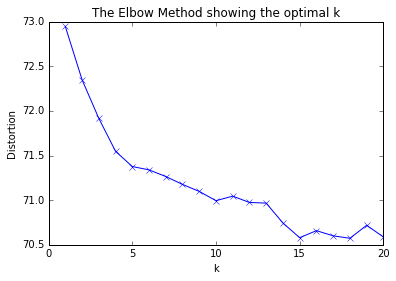

In [29]:
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

In [30]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(data4)

In [31]:
mean = data4.mean(0)
cluster_centers = kmeans.cluster_centers_

In [32]:
index_list_for_clusters = []
for cluster_center in cluster_centers:
    diffs = abs(np.subtract(cluster_center,mean))
    index =  f(diffs,10)
    index_list_for_clusters.append(index)
    print index

[ 147 1069 1346  208  372  145  209   97 1070  786]
[ 516  439  167  892  740  610  494  217  165 1063]
[439 461 837 325 717 181 216 892 217 144]
[ 436  988  216   15 1301  437   18  634 1222  266]


In [33]:
for index_list in index_list_for_clusters:
    print data3.iloc[index_list]

                                                 titles
147   Up, Down, and Sideways: How Other Research Age...
1069  Presidential Forum: Gore and Bush Offer Their ...
1346    Clinton's Science Legacy: Ending on a High Note
208   Patients' Voices: The Powerful Sound in the St...
372              Bringing Science to the National Parks
145                        Balancing the Science Budget
209                                A Time for Restraint
97           Oversight Mechanisms for Clinical Research
1070  Math and Science Education: Training the Teachers
786                    The Shots Heard 'Round the World
                                                 titles
516   Noxa, a BH3-Only Member of the Bcl-2 Family an...
439   Positional Syntenic Cloning and Functional Cha...
167   Central Role for G Protein-Coupled Phosphoinos...
892   Regulated Cleavage of a Contact-Mediated Axon ...
740   Role of the Mouse ank Gene in Control of Tissu...
610   Kinesin Superfamily Motor Protein KIF17 an

In [34]:
ten_nn = NearestNeighbors(n_neighbors=10)
ten_nn.fit(data4)
distances, indices = ten_nn.kneighbors(cluster_centers)
for index_list in indices:
    print data2.iloc[index_list]

      vocabulary
167     national
19      research
2156  institutes
1553     funding
1532    director
3592    agencies
3650       funds
2808      funded
2429     council
4511     leaders
      vocabulary
4            end
9            org
11    sciencemag
2251        noxa
3404        mlin
5261        rory
2454       kif17
5073      ifnar1
3349     calcyon
4129       piflp
           vocabulary
5322             lcts
5279         aptamers
5411             neas
4995             dnag
5454             trxr
4975  proteorhodopsin
5312             doxy
5261             rory
3399              ag7
4535            nompc
           vocabulary
4                 end
9                 org
11         sciencemag
12                vol
3399              ag7
5411             neas
4995             dnag
4535            nompc
5322             lcts
4975  proteorhodopsin
